In [1]:
import pandas as pd
import numpy as np
from sklearn.svm import SVC, LinearSVC, SVR
from sklearn.model_selection import train_test_split, GridSearchCV, cross_val_score, KFold
from sklearn.preprocessing import OneHotEncoder, LabelEncoder
from matplotlib import pyplot as plt, colors

***ЗАДАНИЕ 1***

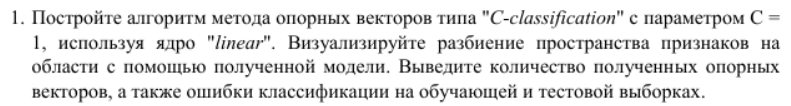

X1        X2 Color
1  0.148747  0.131288   red
2 -0.048815  0.036423   red
3 -0.062391 -0.234860   red
4  0.354839 -0.177403   red
5 -0.145617  0.081265   red

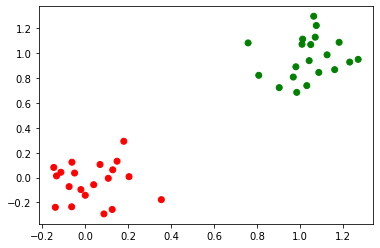

In [2]:
data = pd.read_csv('svmdata1.txt', sep='\t')
test_data = pd.read_csv('svmdata1test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Color)
data.head()

In [3]:
X, y = data.drop('Color', axis=1), data.Color

In [4]:
clf = SVC(kernel='linear', C=1)
clf.fit(X, y)
clf.coef_

array([[-1.50127222, -1.22347711]])

Text(0.5, 1.0, 'Train dataset')

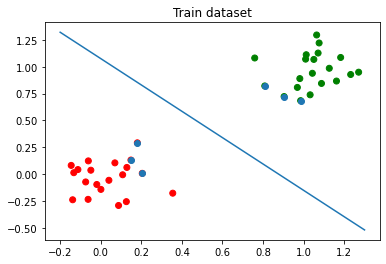

In [5]:
xs = np.arange(-0.2, 1.5, 0.3)
ys = -(xs * clf.coef_[0, 0] + clf.intercept_) / clf.coef_[0, 1]
plt.plot(xs, ys)
plt.scatter(data.X1, data.X2, c=data.Color)
plt.scatter(clf.support_vectors_[:, 0], clf.support_vectors_[:, 1])
plt.title("Train dataset")

1.0

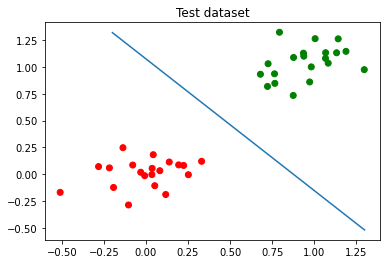

In [6]:
X_test, y_test = test_data.drop('Color', axis=1), test_data.Color
plt.scatter(test_data.X1, test_data.X2, c=test_data.Color)
plt.plot(xs, ys)
plt.title("Test dataset")
clf.score(X_test, y_test)

***Задание 2***

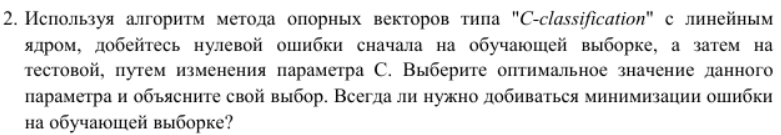

X1        X2 Colors
1  0.076976 -0.393209    red
2 -0.553392  0.212363    red
3  0.535483 -0.053169    red
4 -0.001037 -0.000010    red
5 -0.121083  0.464640    red

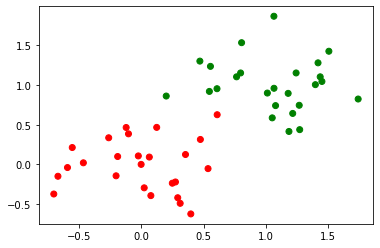

In [7]:
data = pd.read_csv('svmdata2.txt', sep='\t')
test_data = pd.read_csv('svmdata2test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

In [8]:
X, y = data.drop('Colors', axis=1), data.Colors
for c in np.arange(1, 50, 0.1):
    clf = LinearSVC(C=c, dual=False)
    clf.fit(X, y)
    print(c, clf.score(X, y))

1.0 0.98
1.1 0.98
1.2000000000000002 0.98
1.3000000000000003 0.98
1.4000000000000004 0.98
1.5000000000000004 0.98
1.6000000000000005 0.98
1.7000000000000006 0.98
1.8000000000000007 0.98
1.9000000000000008 0.98
2.000000000000001 0.98
2.100000000000001 0.98
2.200000000000001 0.98
2.300000000000001 0.98
2.4000000000000012 0.98
2.5000000000000013 0.98
2.6000000000000014 0.98
2.7000000000000015 0.98
2.8000000000000016 0.98
2.9000000000000017 0.98
3.0000000000000018 0.98
3.100000000000002 0.98
3.200000000000002 0.98
3.300000000000002 0.98
3.400000000000002 0.98
3.500000000000002 0.98
3.6000000000000023 0.98
3.7000000000000024 0.98
3.8000000000000025 0.98
3.9000000000000026 0.98
4.000000000000003 0.98
4.100000000000003 0.98
4.200000000000003 0.98
4.3000000000000025 0.98
4.400000000000003 0.98
4.5000000000000036 0.98
4.600000000000003 0.98
4.700000000000003 0.98
4.800000000000003 0.98
4.900000000000004 0.98
5.0000000000000036 0.98
5.100000000000003 0.98
5.200000000000004 0.98
5.300000000000004

38.20000000000003 0.98
38.30000000000003 0.98
38.400000000000034 0.98
38.500000000000036 0.98
38.60000000000004 0.98
38.70000000000003 0.98
38.80000000000003 0.98
38.900000000000034 0.98
39.000000000000036 0.98
39.10000000000004 0.98
39.20000000000003 0.98
39.30000000000003 0.98
39.400000000000034 0.98
39.500000000000036 0.98
39.60000000000004 0.98
39.70000000000003 0.98
39.80000000000003 0.98
39.900000000000034 0.98
40.000000000000036 0.98
40.10000000000004 0.98
40.20000000000003 0.98
40.30000000000003 0.98
40.400000000000034 0.98
40.500000000000036 0.98
40.60000000000004 0.98
40.70000000000004 0.98
40.80000000000003 0.98
40.900000000000034 0.98
41.000000000000036 0.98
41.10000000000004 0.98
41.20000000000004 0.98
41.30000000000003 0.98
41.400000000000034 0.98
41.500000000000036 0.98
41.60000000000004 0.98
41.70000000000004 0.98
41.80000000000004 0.98
41.900000000000034 0.98
42.000000000000036 0.98
42.10000000000004 0.98
42.20000000000004 0.98
42.30000000000004 0.98
42.400000000000034

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn("Liblinear failed to converge, increase "
C:\ProgramData\Anaconda3\lib\site-packages\sklearn\svm\_base.py:985: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations

(array([[-1.10492653, -1.31066352]]), array([1.24304999]), LinearSVC(C=1))

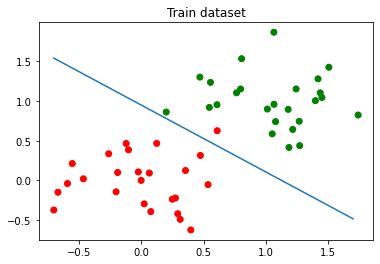

In [9]:
clf = LinearSVC()
params = {'C': np.arange(1, 70)}
gs = GridSearchCV(clf, params)
gs.fit(X, y)
clf = gs.best_estimator_
xs = np.arange(X.X1.min(), X.X1.max(), 0.1)
ys = -(xs * clf.coef_[0, 0] + clf.intercept_) / clf.coef_[0, 1]
plt.plot(xs, ys)
plt.scatter(data.X1, data.X2, c=data.Colors)
plt.title("Train dataset")
clf.coef_, clf.intercept_, clf

1.0

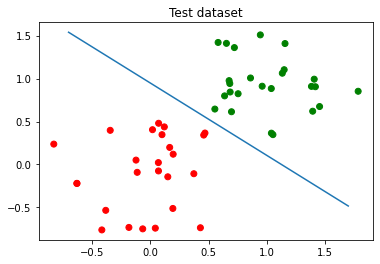

In [10]:
X_test, y_test = test_data.drop('Colors', axis=1), test_data.Colors
plt.scatter(test_data.X1, test_data.X2, c=test_data.Colors)
plt.plot(xs, ys)
plt.title("Test dataset")
clf.score(X_test, y_test)

***ЗАДАНИЕ 3***

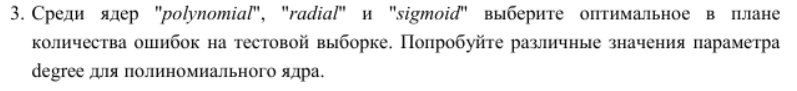

X1        X2 Colors
1 -0.335467  0.102236    red
2  0.671854  0.787542  green
3  1.916900 -0.909649  green
4 -0.582359  0.632418    red
5 -0.329232  0.927994    red

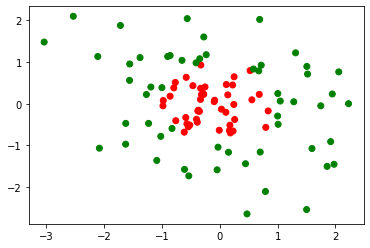

In [11]:
data = pd.read_csv('svmdata3.txt', sep='\t')
#test_data = pd.read_csv('svmdata3test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

In [12]:
X, y = data.drop('Colors', axis=1), data.Colors
clf = SVC(degree=2, C=15)
params = {'kernel': ('rbf', 'poly', 'sigmoid')}
gs = GridSearchCV(clf, param_grid=params, cv=5)
gs.fit(X, y)

GridSearchCV(cv=5, estimator=SVC(C=15, degree=2),
             param_grid={'kernel': ('rbf', 'poly', 'sigmoid')})

In [13]:
gs.cv_results_['mean_test_score']

array([0.95, 0.94, 0.45])

Примечательно, что при четных значениях степени полинома имеем лучшие результаты, чем при нечетных, поскольку лучшим преобразованием пространства является его вытягивание в "колокол" с центром в красной области. Именно такое вытягивание позволяют сделать полиномы четных степеней. Увеличение параметра C дает лучший результат (быстрее всего улучшается параболическое преобразование), *но может привести к переобучению (C - степень наказания за отдельные ошибки, если за них наказывать сильнее, то модель будет на них больше концентрироваться)*

**Скорее всего, обученная модель с параметром C=65 переобучилась, поэтому я поменял C на 15**

***ЗАДАНИЕ 4***

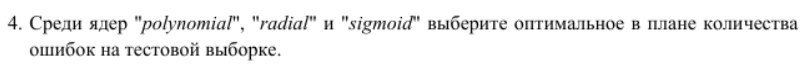

X1        X2 Colors
1  11.503087 -0.872017  green
2   6.952235 -0.368240    red
3   9.157642  1.058048  green
4   3.921632  1.703045  green
5   4.019569  0.706163  green

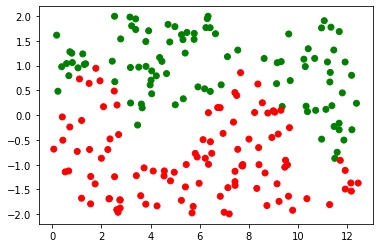

In [14]:
data = pd.read_csv('svmdata4.txt', sep='\t')
test_data = pd.read_csv('svmdata4test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

In [15]:
X, y = data.drop('Colors', axis=1), data.Colors
clf = SVC(degree=2, C=1500)
params = {'kernel': ('rbf', 'poly', 'sigmoid')}
gs = GridSearchCV(clf, param_grid=params, cv=5)
gs.fit(X, y)
gs.cv_results_['mean_test_score']

array([0.97 , 0.835, 0.555])

In [16]:
X_test, y_test = test_data.drop('Colors', axis=1), test_data.Colors
gs.best_estimator_.score(X_test, y_test)

0.975

Лучшее - радиальное ядро 

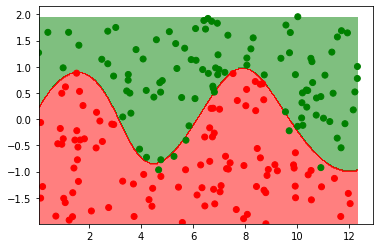

In [17]:
def plot_contour(clf, data):
    h = 0.02
    xx, yy = np.meshgrid(np.arange(data.X1.min(), data.X1.max(), h),
                         np.arange(data.X2.min(), data.X2.max(), h))

    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = np.array([1 if i == 'red' else 0 for i in Z])
    Z = Z.reshape(xx.shape)
    plt.contourf(xx, yy, Z, alpha=0.5, cmap=colors.ListedColormap(['g', 'r']))

    plt.scatter(data.X1, data.X2, c=data.Colors)
    
plot_contour(gs.best_estimator_, test_data)

***ЗАДАНИЕ 5***

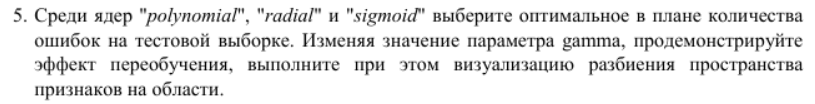

X1        X2 Colors
1 -0.481785  0.547612    red
2 -0.284473  0.835821    red
3 -0.324098  0.976975    red
4 -0.078877  0.363042    red
5 -0.021214  0.804514    red

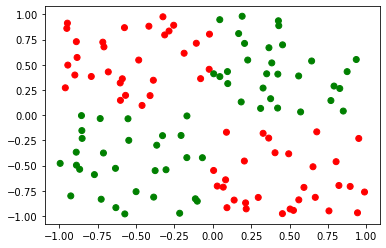

In [18]:
data = pd.read_csv('svmdata5.txt', sep='\t')
test_data = pd.read_csv('svmdata5test.txt', sep='\t')
plt.scatter(data.X1, data.X2, c=data.Colors)
data.head()

poly 1 0.95


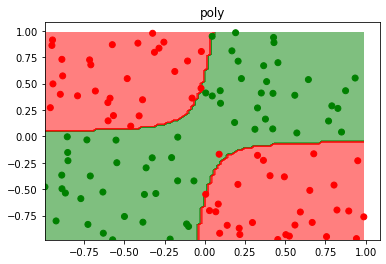

poly 4 0.9666666666666667


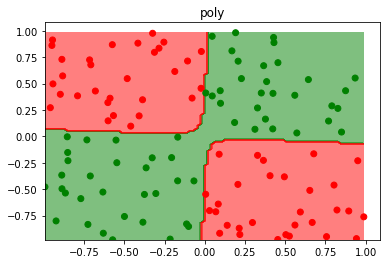

poly 7 0.9333333333333333


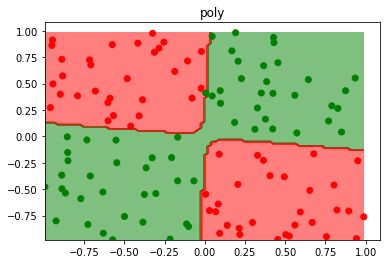

poly 10 0.925


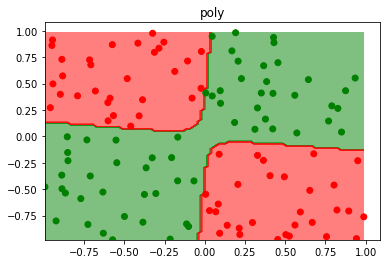

poly 13 0.925


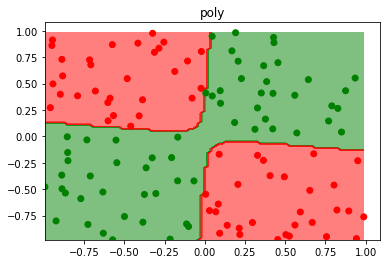

poly 16 0.9583333333333334


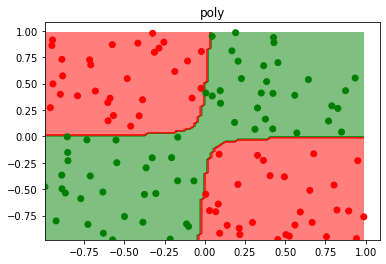

poly 19 0.9583333333333334


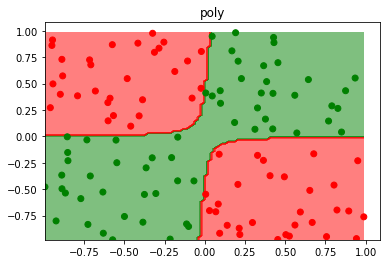

poly 22 0.9666666666666667


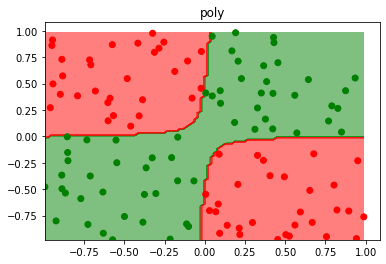

poly 25 0.9666666666666667


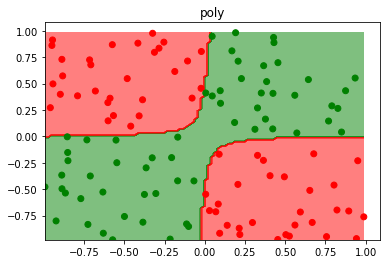

poly 28 0.9666666666666667


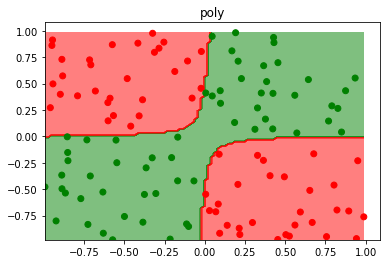

radial 1 0.9583333333333334


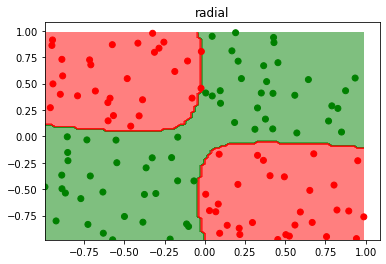

radial 4 0.925


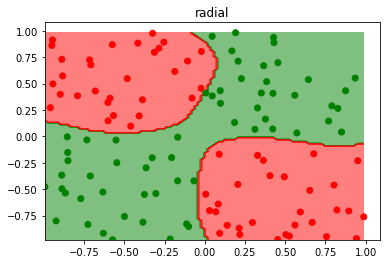

radial 7 0.925


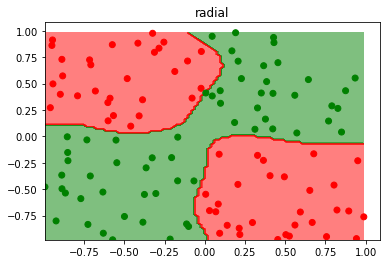

radial 10 0.925


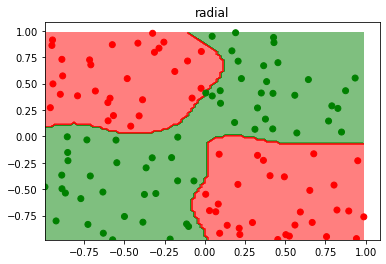

radial 13 0.925


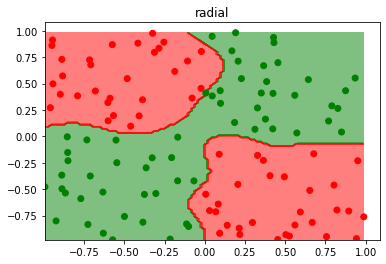

radial 16 0.925


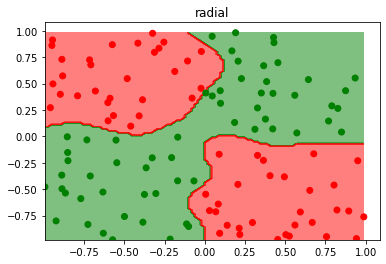

radial 19 0.9166666666666666


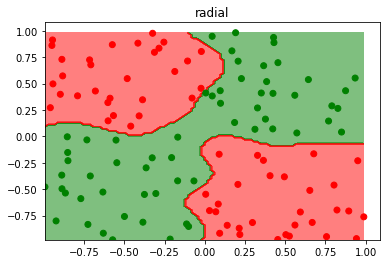

radial 22 0.9166666666666666


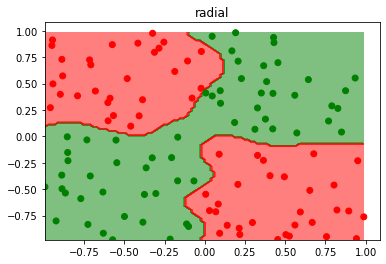

radial 25 0.9166666666666666


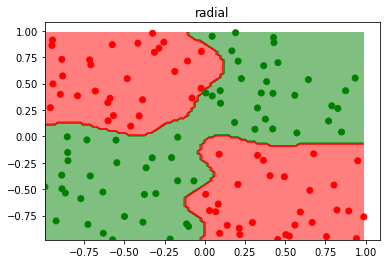

radial 28 0.9166666666666666


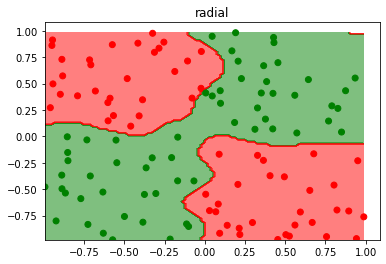

sigmoid 1 0.525


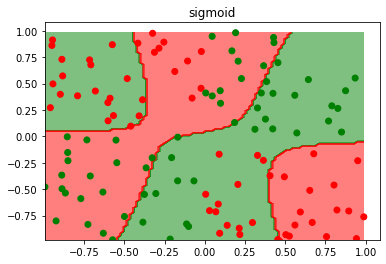

sigmoid 4 0.5083333333333333


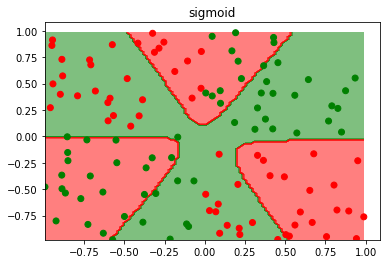

sigmoid 7 0.49166666666666664


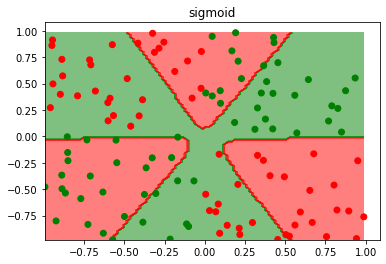

sigmoid 10 0.49166666666666664


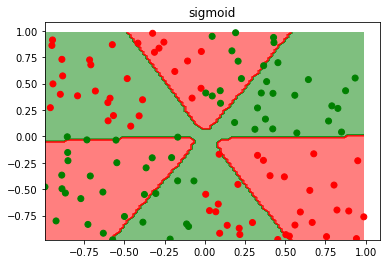

sigmoid 13 0.5


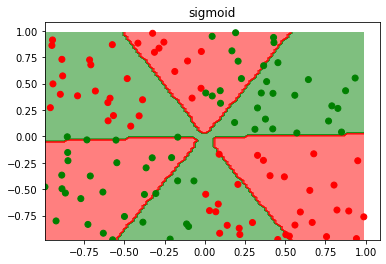

sigmoid 16 0.5


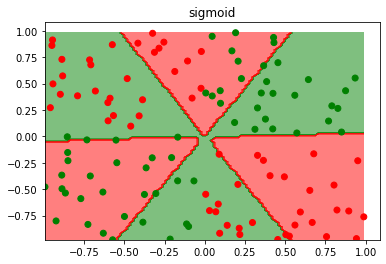

sigmoid 19 0.5


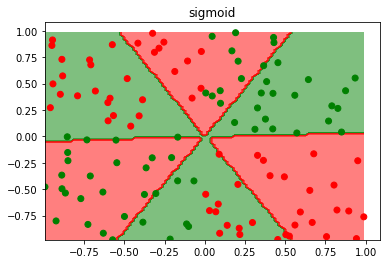

sigmoid 22 0.5083333333333333


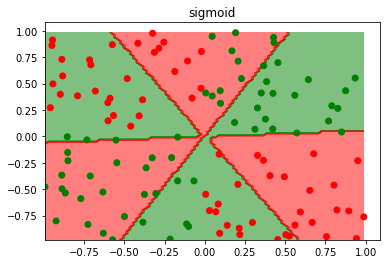

sigmoid 25 0.5083333333333333


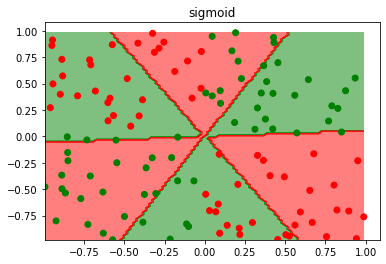

sigmoid 28 0.5083333333333333


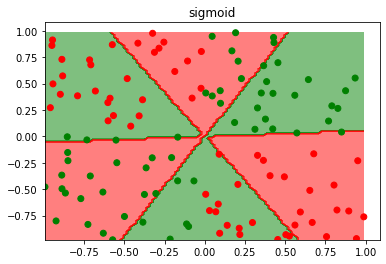

In [19]:
c = 15
models = {'poly': SVC(kernel='poly', C = c, degree=2), 'radial': SVC(kernel='rbf', C = c),
          'sigmoid': SVC(kernel='sigmoid', C = c)}
X, y = data.drop('Colors', axis=1), data.Colors
X_test, y_test = test_data.drop('Colors', axis=1), test_data.Colors
for name, model in models.items():
    maxval = 30 if name == 'poly' else 30
    for gamma in range(1, 31, 3):
        model.set_params(gamma=gamma)
        model.fit(X, y)
        print(name, gamma, model.score(X_test, y_test))
        plot_contour(model, data)
        plt.title(name)
        plt.show()

1 0.9583333333333334


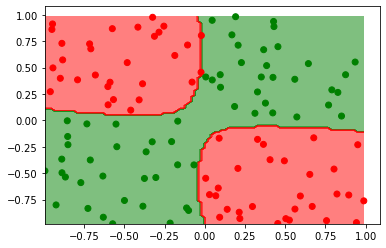

2 0.9333333333333333


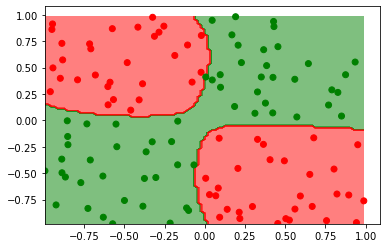

3 0.9333333333333333


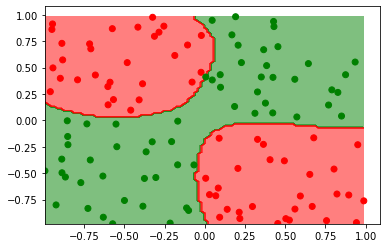

4 0.925


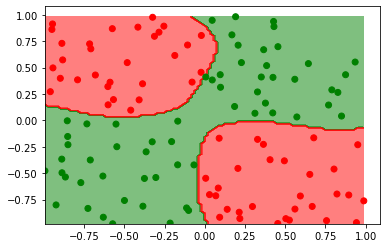

5 0.925


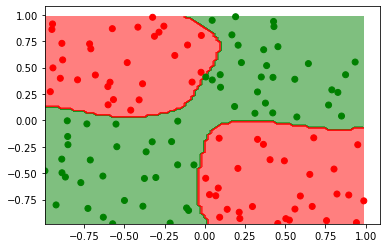

6 0.925


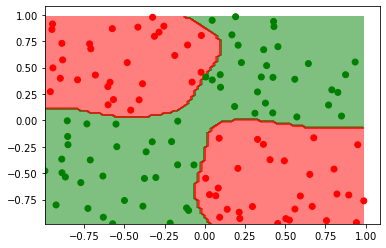

7 0.925


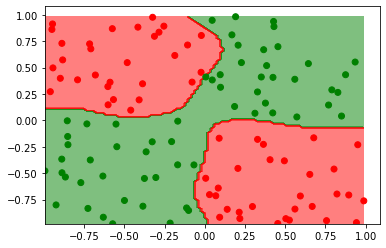

8 0.9333333333333333


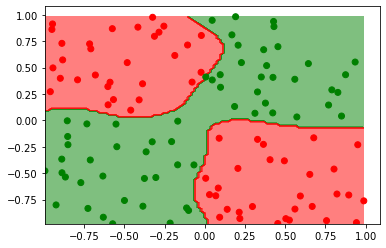

9 0.9333333333333333


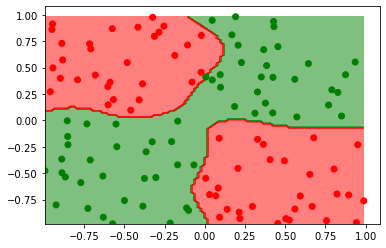

10 0.925


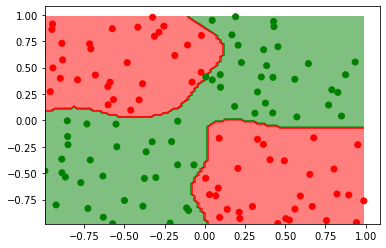

11 0.925


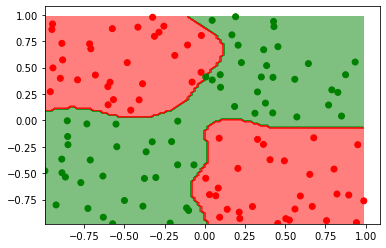

12 0.925


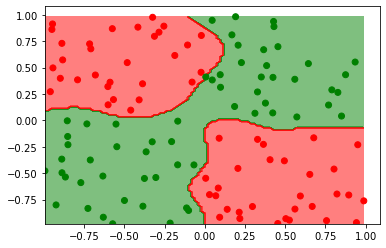

13 0.925


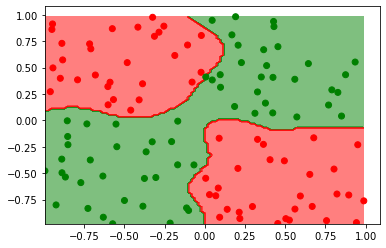

14 0.925


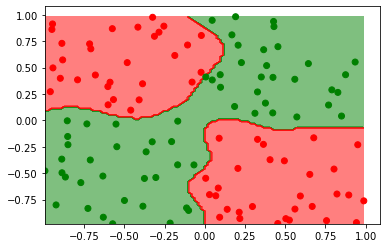

15 0.925


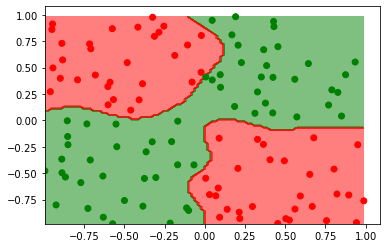

16 0.925


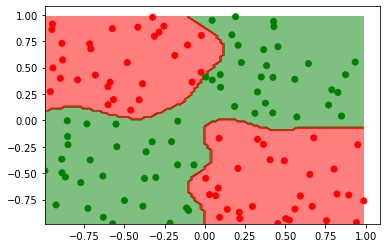

17 0.9166666666666666


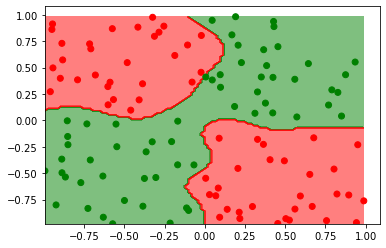

18 0.9166666666666666


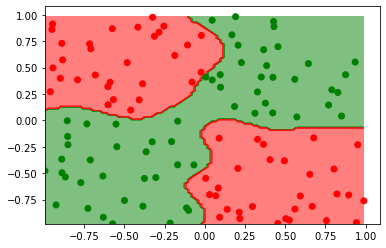

19 0.9166666666666666


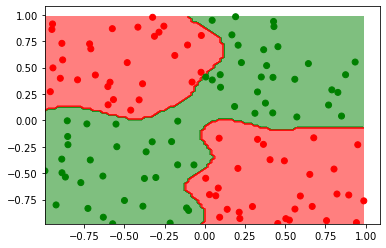

20 0.9166666666666666


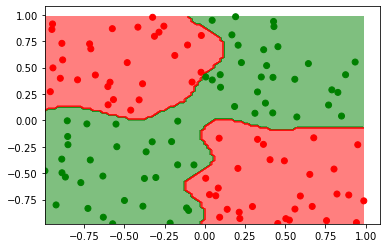

21 0.9166666666666666


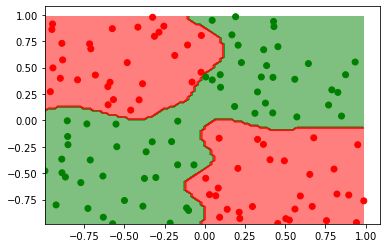

22 0.9166666666666666


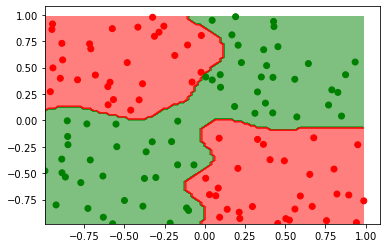

23 0.9166666666666666


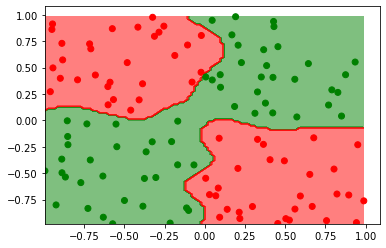

24 0.9166666666666666


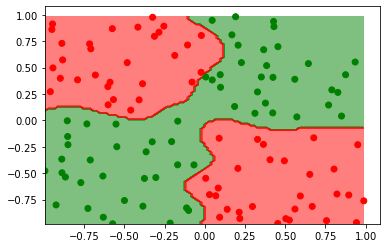

25 0.9166666666666666


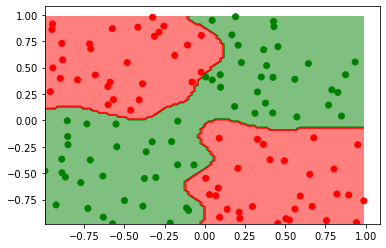

26 0.9166666666666666


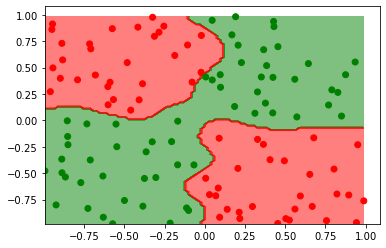

27 0.9166666666666666


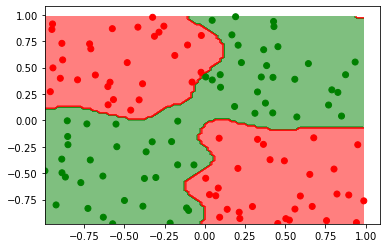

28 0.9166666666666666


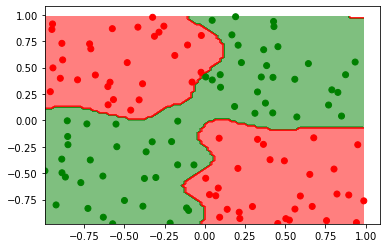

29 0.9166666666666666


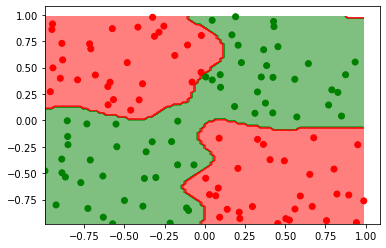

30 0.9166666666666666


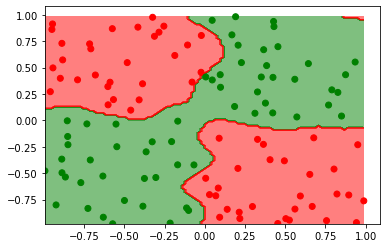

31 0.9083333333333333


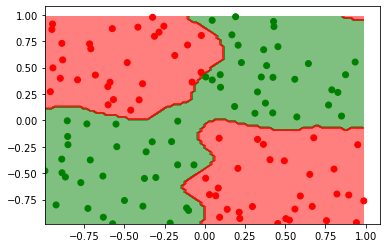

32 0.9083333333333333


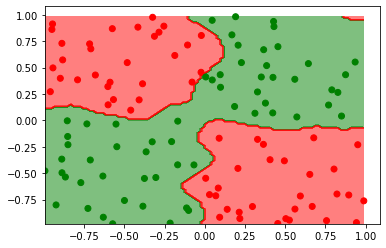

33 0.9083333333333333


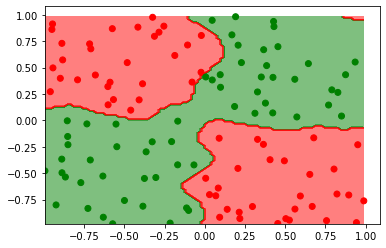

34 0.9083333333333333


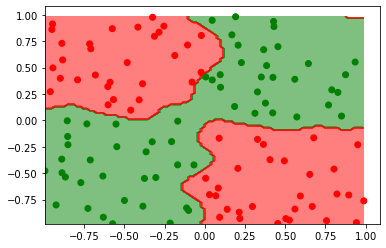

35 0.9083333333333333


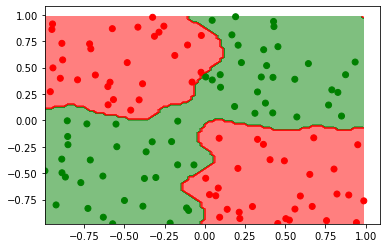

36 0.9083333333333333


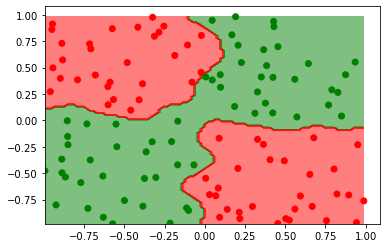

37 0.9083333333333333


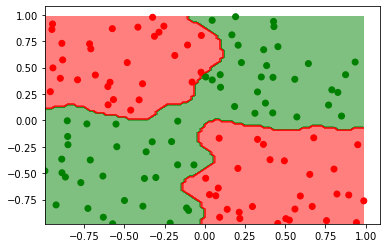

38 0.9083333333333333


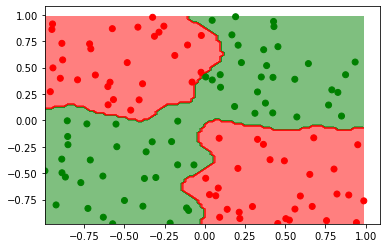

39 0.9083333333333333


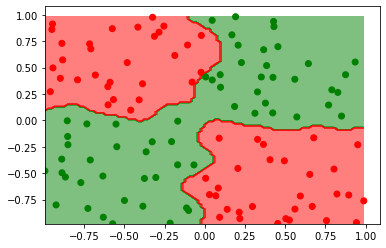

40 0.9083333333333333


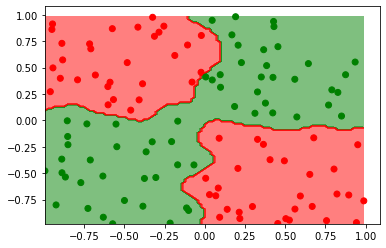

41 0.9083333333333333


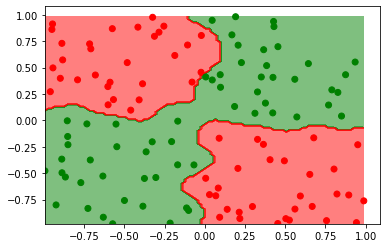

42 0.9083333333333333


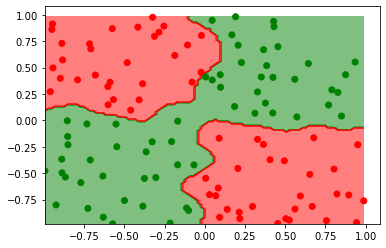

43 0.9083333333333333


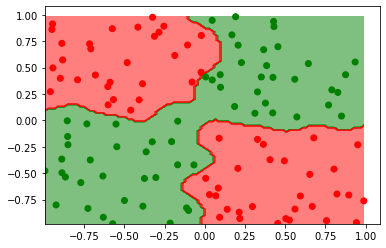

44 0.9083333333333333


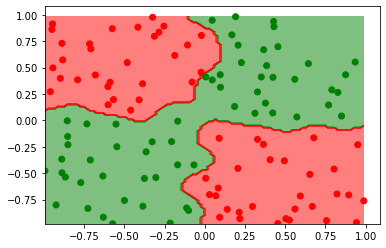

45 0.9083333333333333


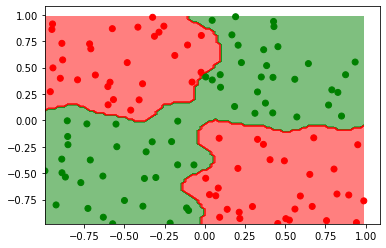

46 0.9083333333333333


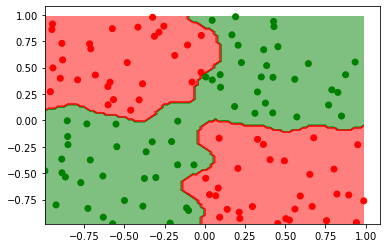

47 0.9083333333333333


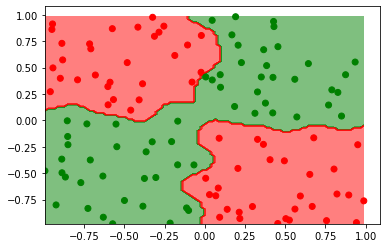

48 0.9083333333333333


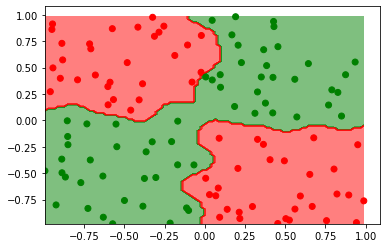

49 0.9083333333333333


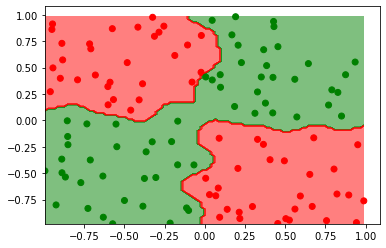

50 0.9083333333333333


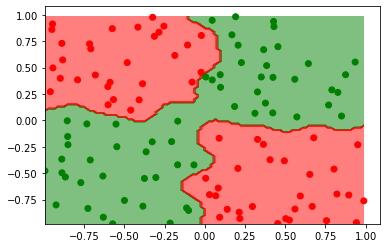

51 0.9083333333333333


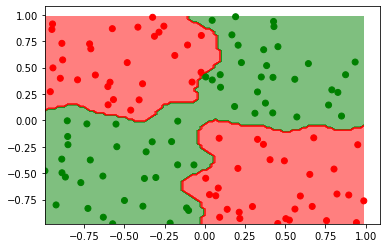

52 0.9083333333333333


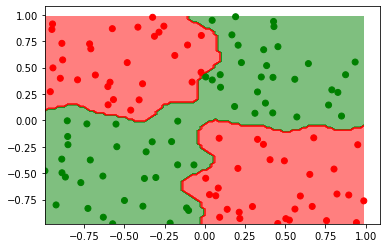

53 0.9083333333333333


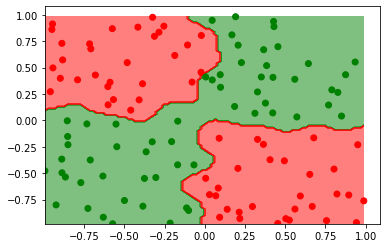

54 0.9083333333333333


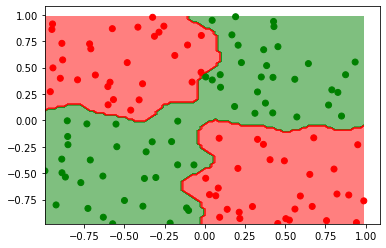

55 0.9083333333333333


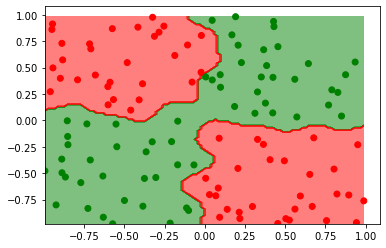

56 0.9083333333333333


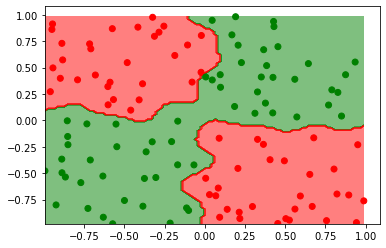

57 0.9083333333333333


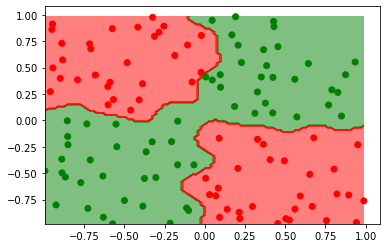

58 0.9083333333333333


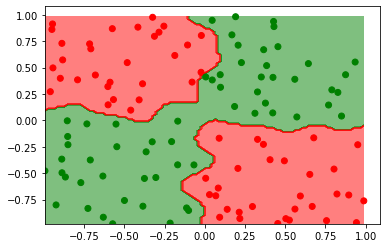

59 0.9083333333333333


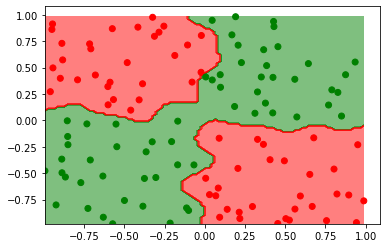

60 0.9083333333333333


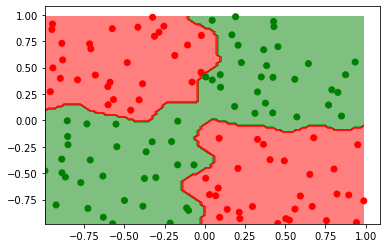

61 0.9083333333333333


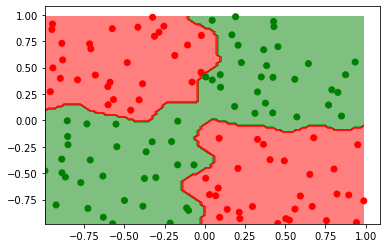

62 0.9083333333333333


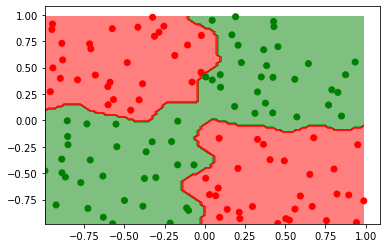

63 0.9083333333333333


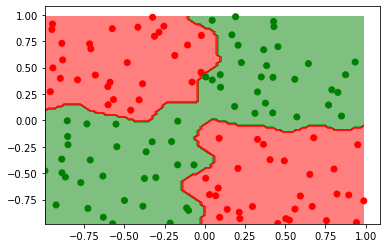

64 0.9083333333333333


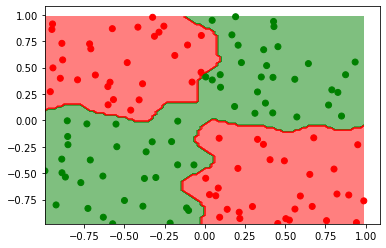

65 0.9083333333333333


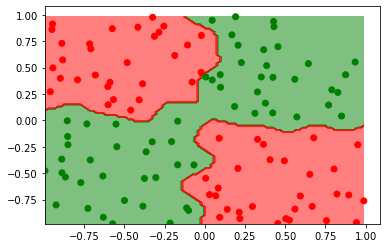

66 0.9083333333333333


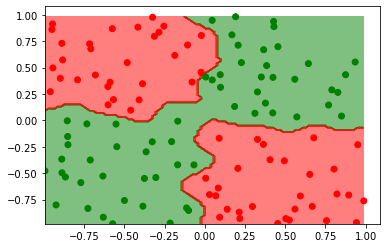

67 0.9083333333333333


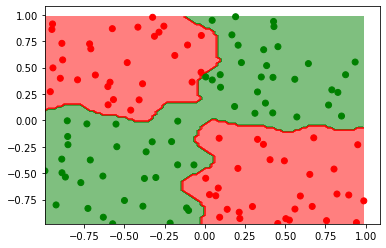

68 0.9083333333333333


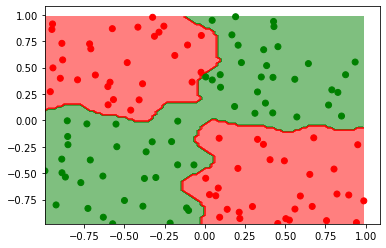

69 0.9083333333333333


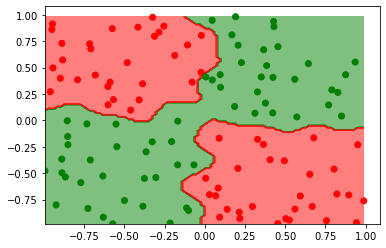

70 0.9083333333333333


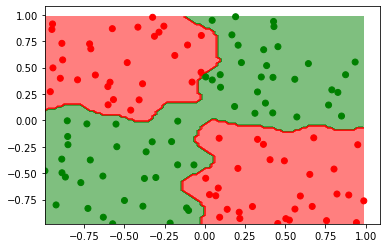

71 0.9083333333333333


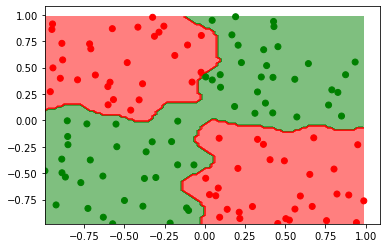

72 0.9083333333333333


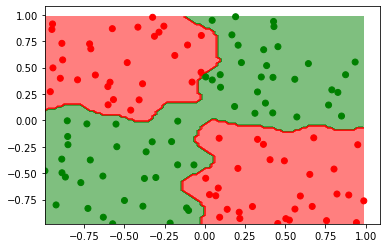

73 0.9083333333333333


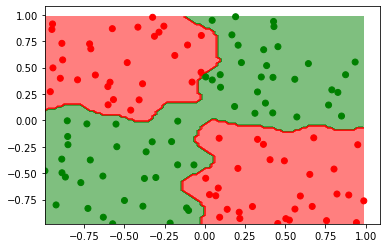

74 0.9083333333333333


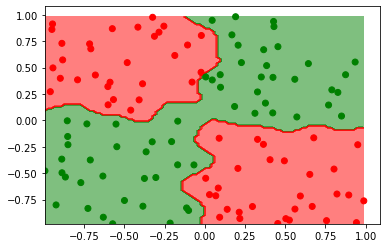

75 0.9083333333333333


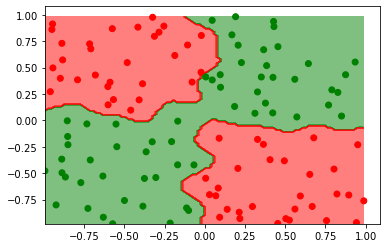

76 0.9083333333333333


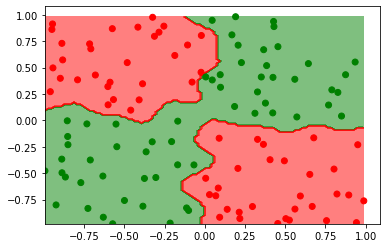

77 0.9083333333333333


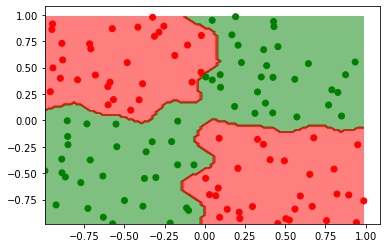

78 0.9083333333333333


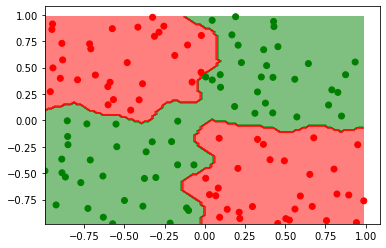

79 0.9083333333333333


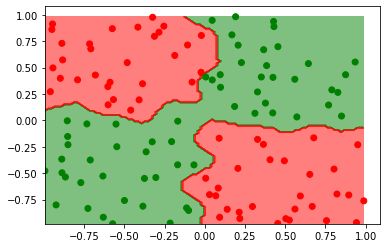

80 0.9083333333333333


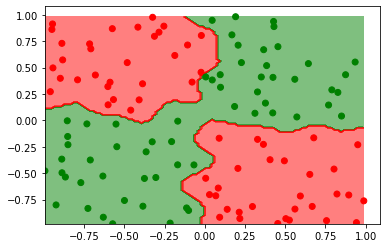

81 0.9083333333333333


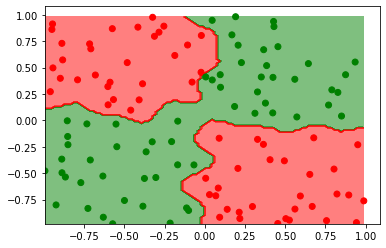

82 0.9083333333333333


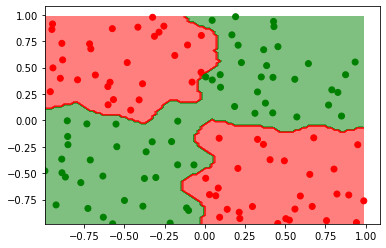

83 0.9083333333333333


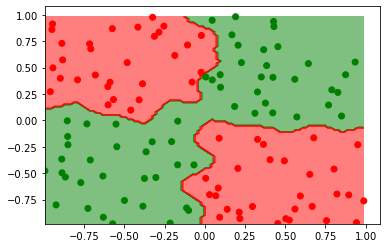

84 0.9083333333333333


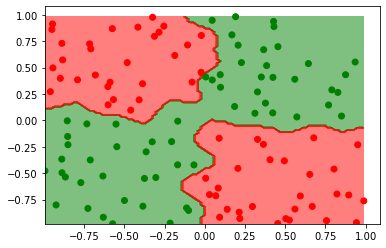

85 0.9083333333333333


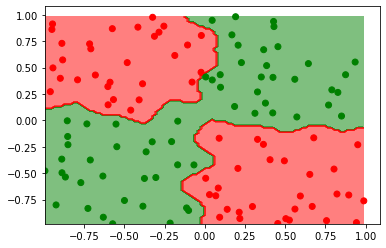

86 0.9083333333333333


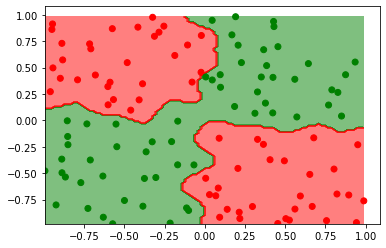

87 0.9083333333333333


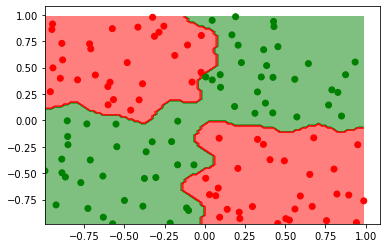

88 0.9083333333333333


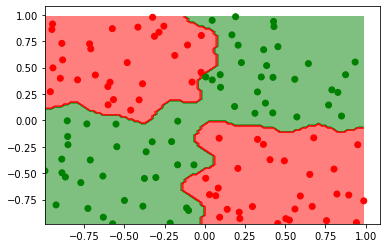

89 0.9083333333333333


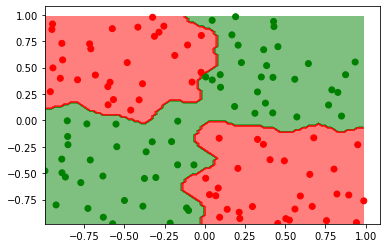

90 0.9083333333333333


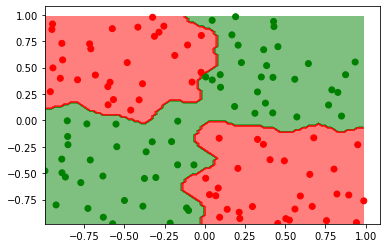

91 0.9083333333333333


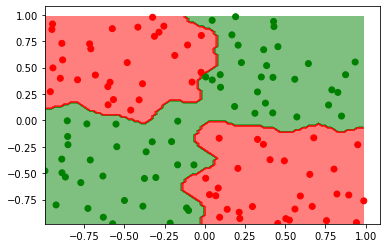

92 0.9083333333333333


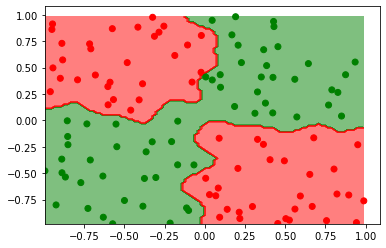

93 0.9083333333333333


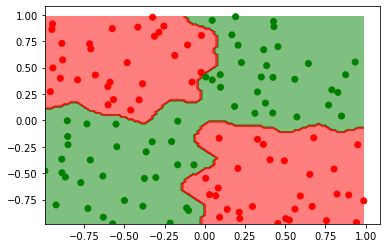

94 0.9083333333333333


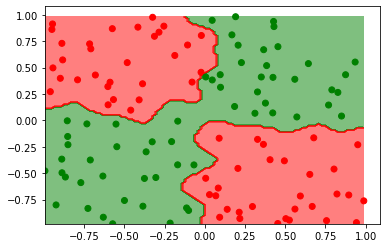

95 0.9083333333333333


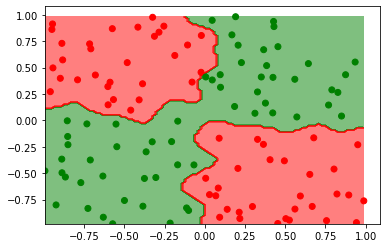

96 0.9083333333333333


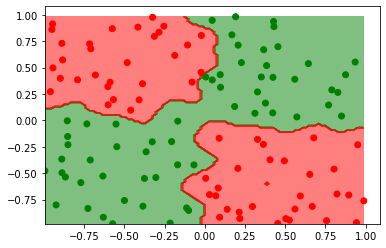

97 0.9083333333333333


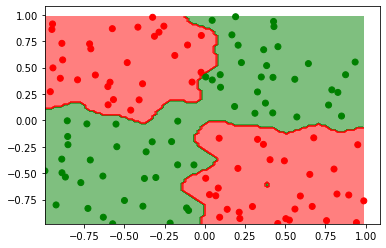

98 0.9083333333333333


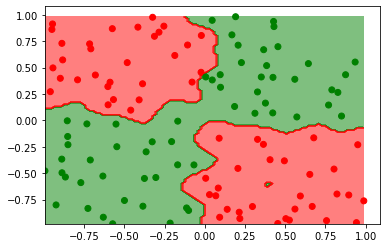

99 0.9083333333333333


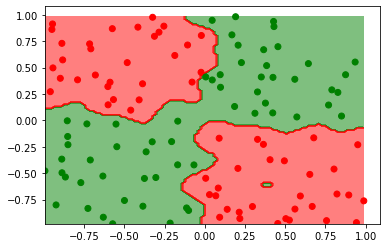

100 0.9083333333333333


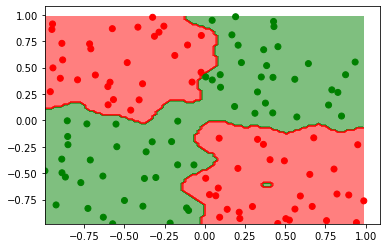

In [20]:
for gamma in range(1, 101, 1):
    model = SVC(kernel='rbf', C = 15, degree=2, gamma=gamma)
    model.fit(X, y)
    print(gamma, model.score(X_test, y_test))
    plot_contour(model, data)
    #plt.title(name)
    plt.show()

***ЗАДАНИЕ 6***

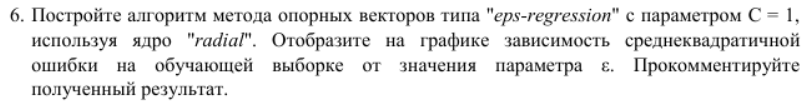

X         Y
1  0.00 -0.035662
2  0.05  0.059784
3  0.10 -0.111344
4  0.15  0.099728
5  0.20  0.297808

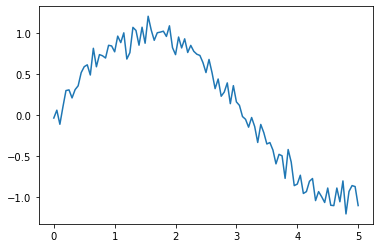

In [21]:
data = pd.read_csv('svmdata6.txt', sep='\t')
#test_data = pd.read_csv('svmdata6test.txt', sep='\t')
plt.plot(data.X, data.Y)
data.head()

In [22]:
X = data.drop('Y', axis=1)
y = data.Y
X, X_test, y, y_test = train_test_split(X, y, train_size=0.8)

def score(model, X, y):
    dif = model.predict(X) - y
    return np.sqrt(np.mean(dif * dif))

In [23]:
results = []
for eps in np.arange(0, 1.5, 0.05):
    model = SVR(epsilon=eps)
    model.fit(X, y)
    results.append(score(model, X_test, y_test))
min(results)

0.1251206573713114

Text(0, 0.5, 'mean standard deviation')

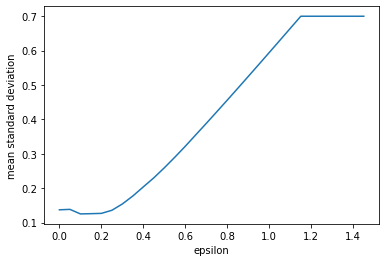

In [24]:
plt.plot(np.arange(0, 1.5, 0.05), results)
plt.xlabel('epsilon')
plt.ylabel('mean standard deviation')

Штрафуем модель за те примеры, в которых она ошибается больше, чем на epsilon
Если сделать слишком большой порог толерантности, то она ничему не научится.